# Test PDPbox with binary classification problem
## Kaggle Titanic with XGBoost
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(0, '../../')
%matplotlib inline

from pdpbox import pdp, get_dataset

## get dataset

In [2]:
test_titanic = get_dataset.titanic()

In [3]:
test_titanic.keys()

['xgb_model', 'data', 'features', 'target']

In [4]:
titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_model = test_titanic['xgb_model']
titanic_target = test_titanic['target']

## Binary feature: Sex

In [5]:
pdp_sex = pdp.pdp_isolate(model=titanic_model, 
                          dataset=titanic_data,
                          model_features=titanic_features,
                          feature='Sex')

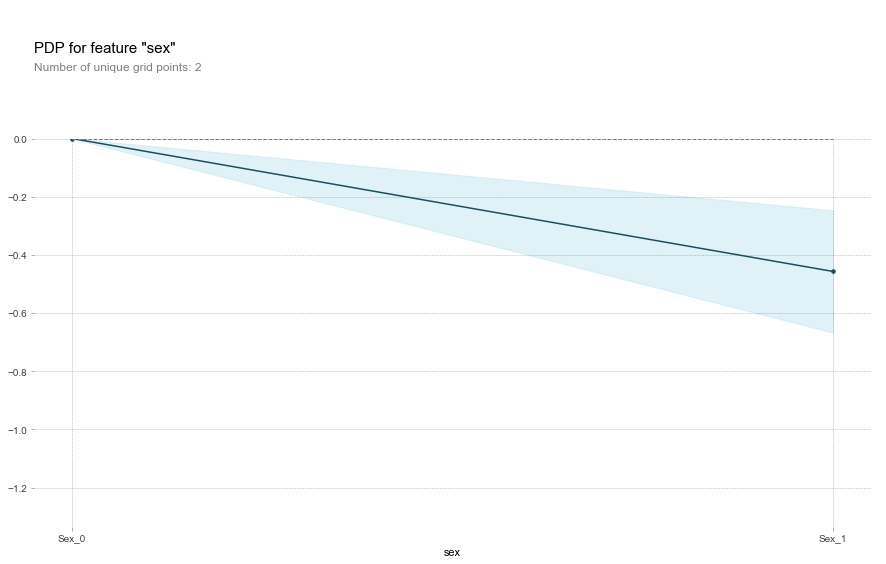

In [6]:
# default
fig, axes = pdp.pdp_plot(pdp_sex, 'sex')

In [7]:
axes

{'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0xbc41c50>,
 'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0xbb89be0>}

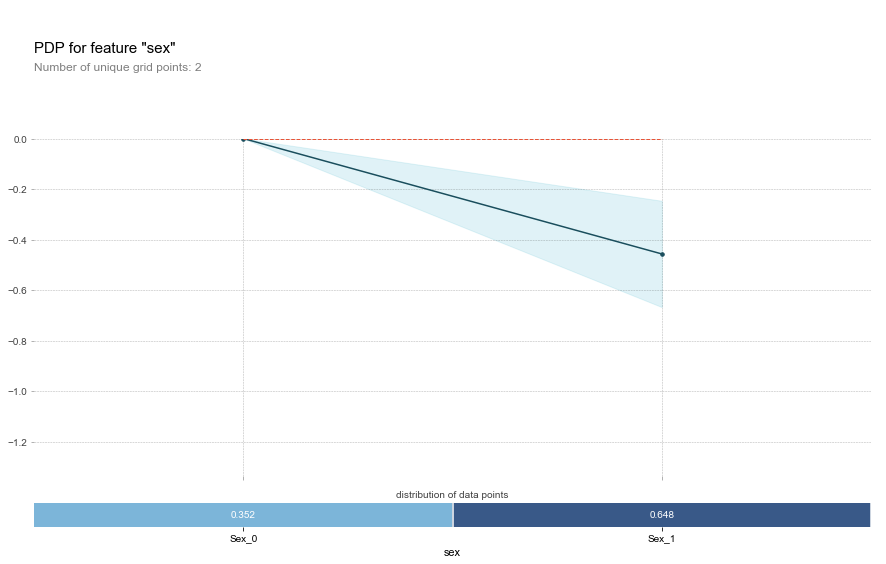

In [8]:
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', plot_pts_dist=True)

In [9]:
axes

{'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0xeb2e7f0>,
  '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0xea947b8>},
 'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0xe945f28>}

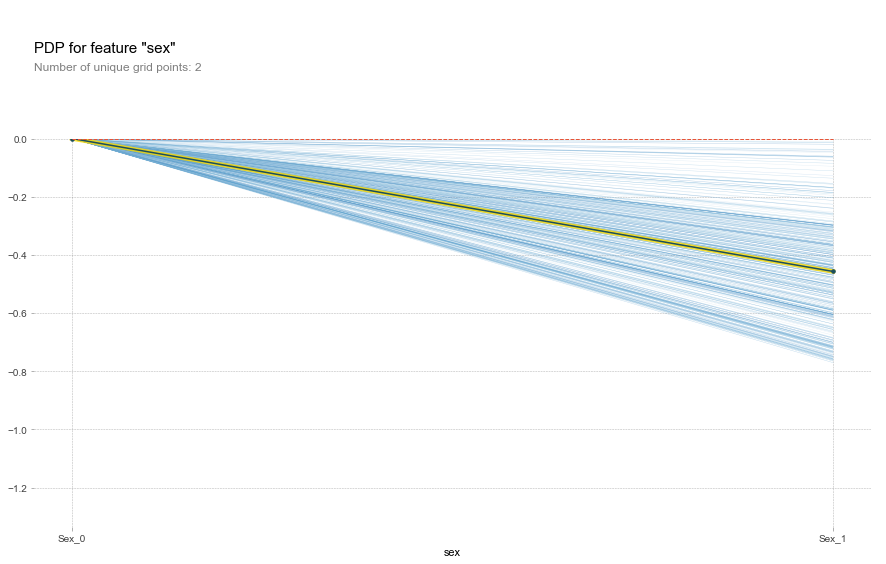

In [10]:
# also plot out the individual conditional expectation lines
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', plot_lines=True, frac_to_plot=0.5)

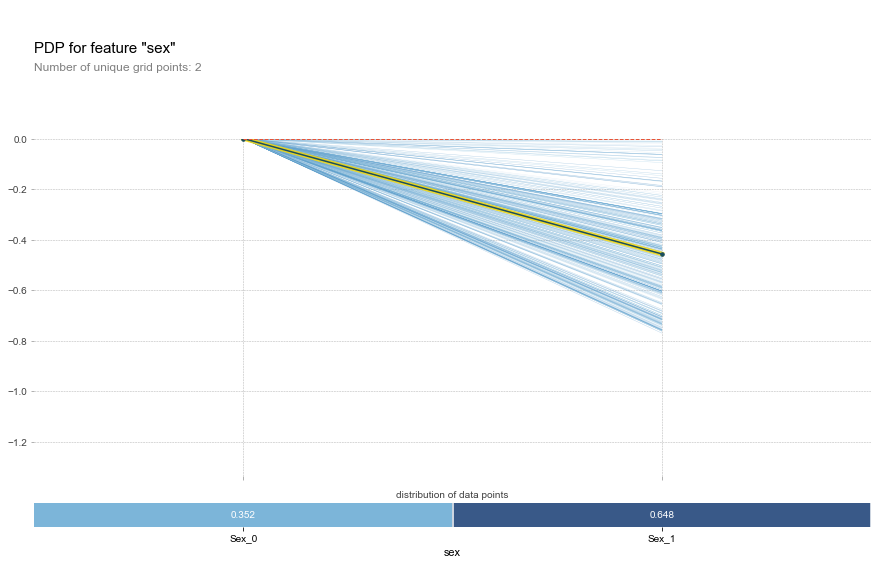

In [11]:
# also plot out the individual conditional expectation lines
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', plot_lines=True, frac_to_plot=0.5, plot_pts_dist=True)

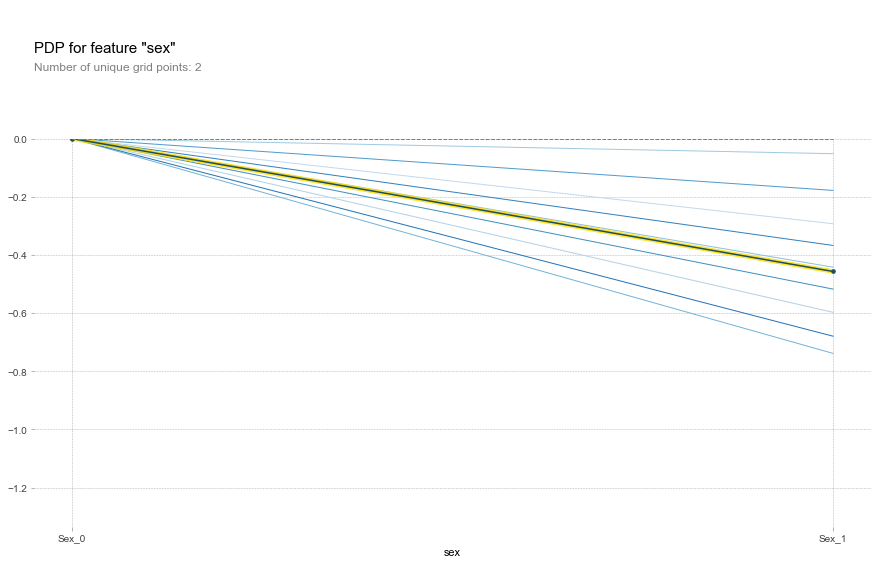

In [12]:
# try to do clustering on all the individual conditional expectation lines
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', center=True, frac_to_plot=0.5, cluster=True, 
                         n_cluster_centers=10, cluster_method='accurate')

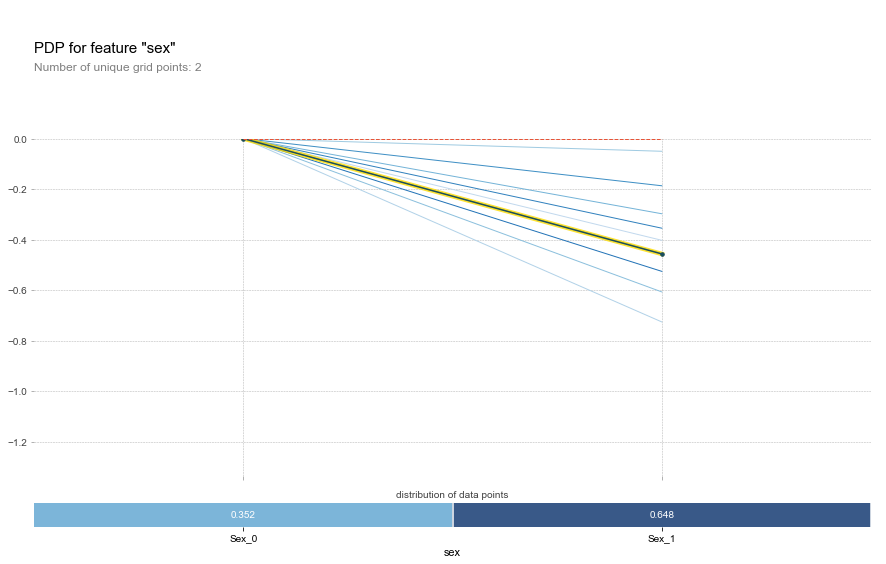

In [13]:
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', center=True, frac_to_plot=0.5, cluster=True, 
                         n_cluster_centers=10, cluster_method='approx', plot_pts_dist=True)

## one-hot encoding feature: embarked
for one-hot encoding feature, should provide a list containing all the related columns

In [14]:
pdp_embark = pdp.pdp_isolate(model=titanic_model, dataset=titanic_data, 
                             model_features=titanic_features,
                             feature=['Embarked_C', 'Embarked_S', 'Embarked_Q'])

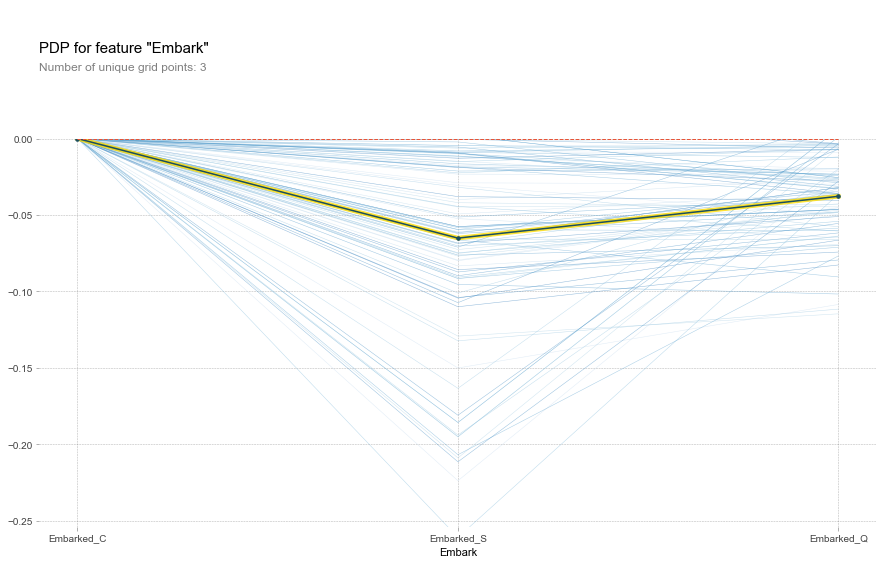

In [15]:
fig, axes = pdp.pdp_plot(pdp_embark, 'Embark', center=True, plot_lines=True, frac_to_plot=100)

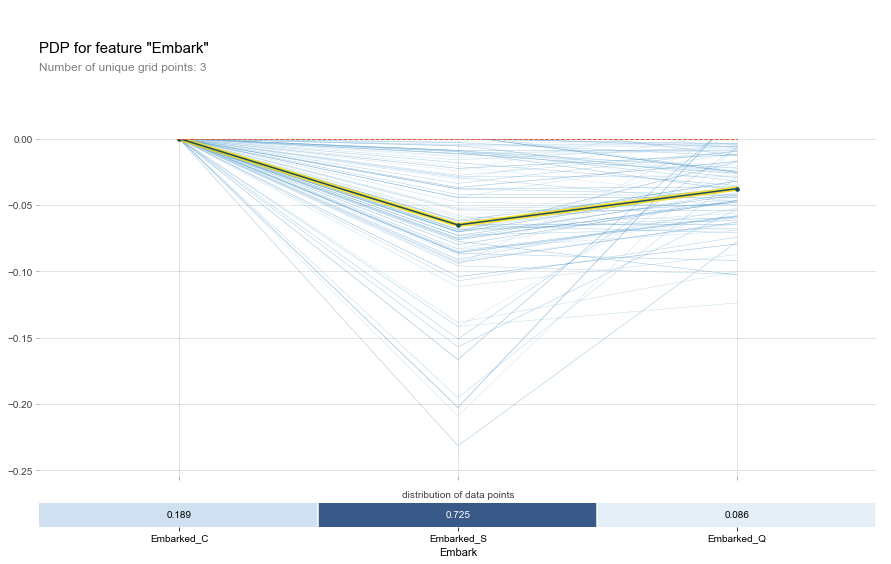

In [16]:
fig, axes = pdp.pdp_plot(pdp_embark, 'Embark', center=True, plot_lines=True, frac_to_plot=100, plot_pts_dist=True)

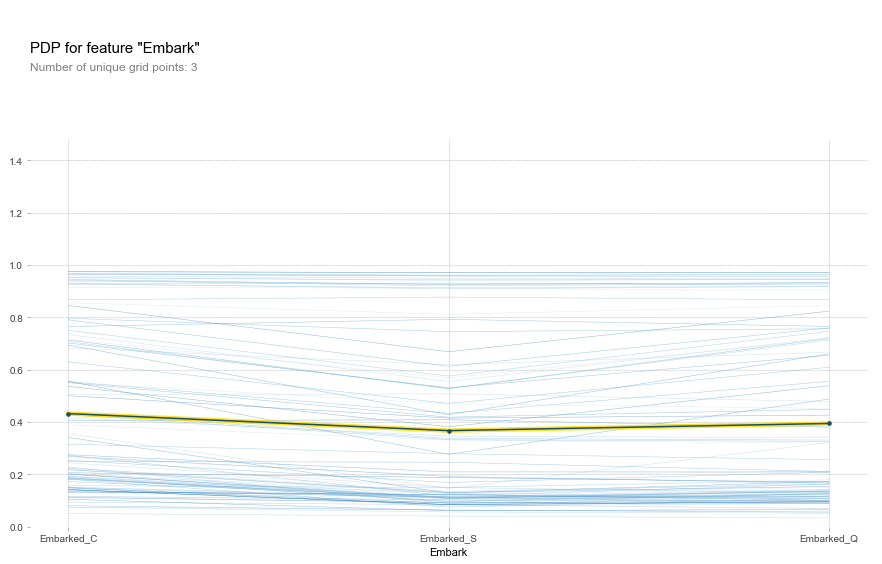

In [17]:
# try to set center=False, it's harder to tell the difference when the lines are not centered
fig, axes = pdp.pdp_plot(pdp_embark, 'Embark', center=False, plot_lines=True, frac_to_plot=100)

## numeric feature: fare

In [18]:
pdp_fare = pdp.pdp_isolate(model=titanic_model, 
                           dataset=titanic_data,
                           model_features=titanic_features, 
                           feature='Fare')

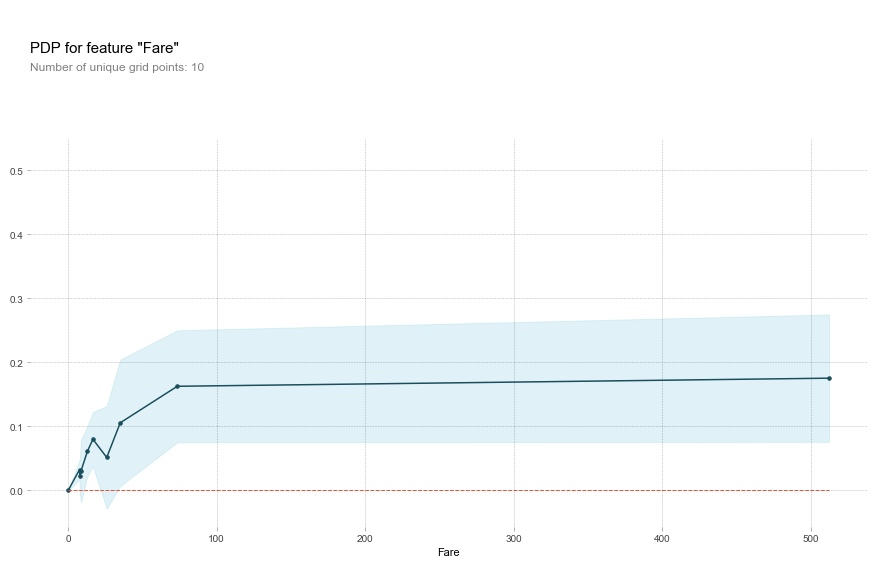

In [19]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare')

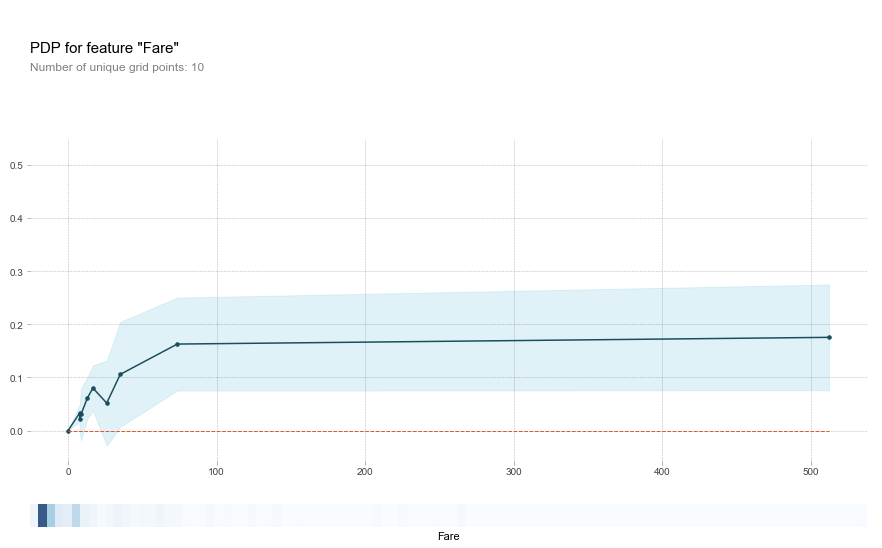

In [20]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_pts_dist=True)

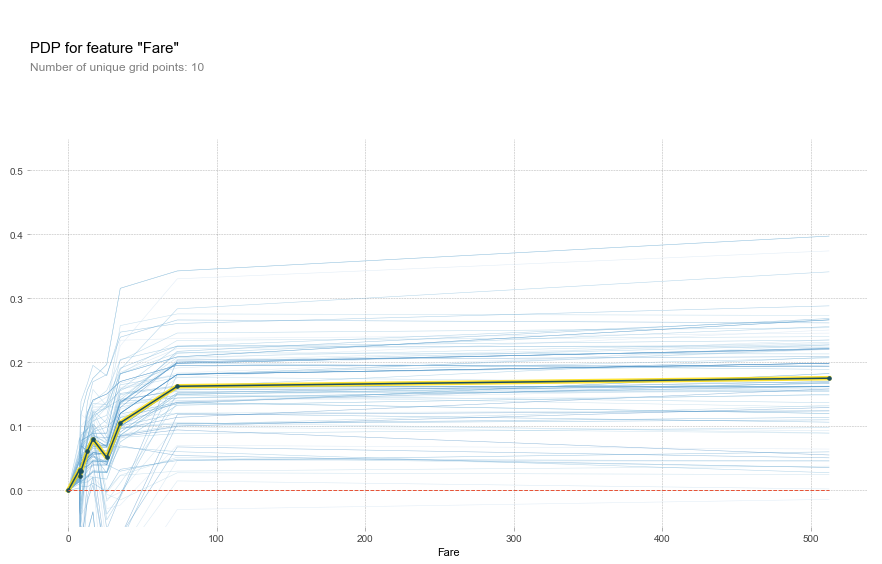

In [21]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=100)

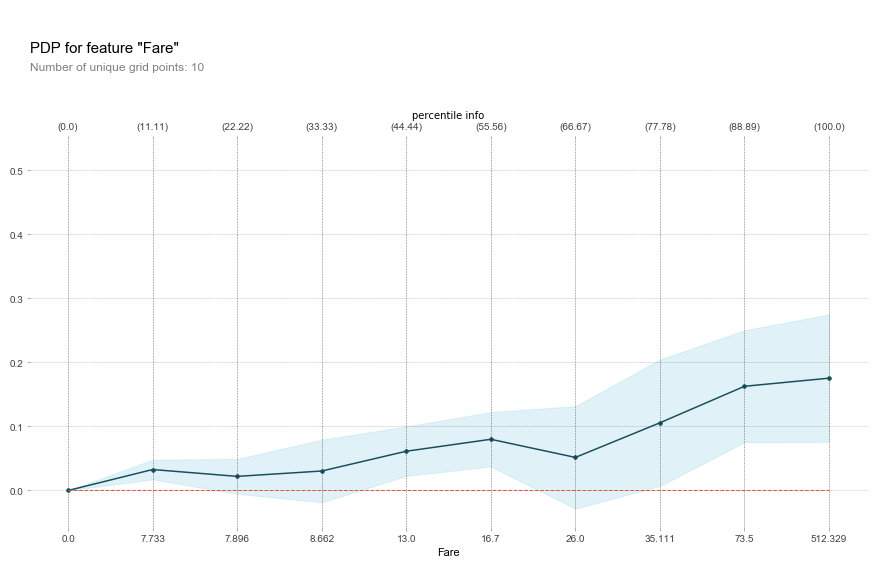

In [22]:
# for numeric feature, you can set x_quantile=True to make x ticks the same as the feature grid points
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True, show_percentile=True)

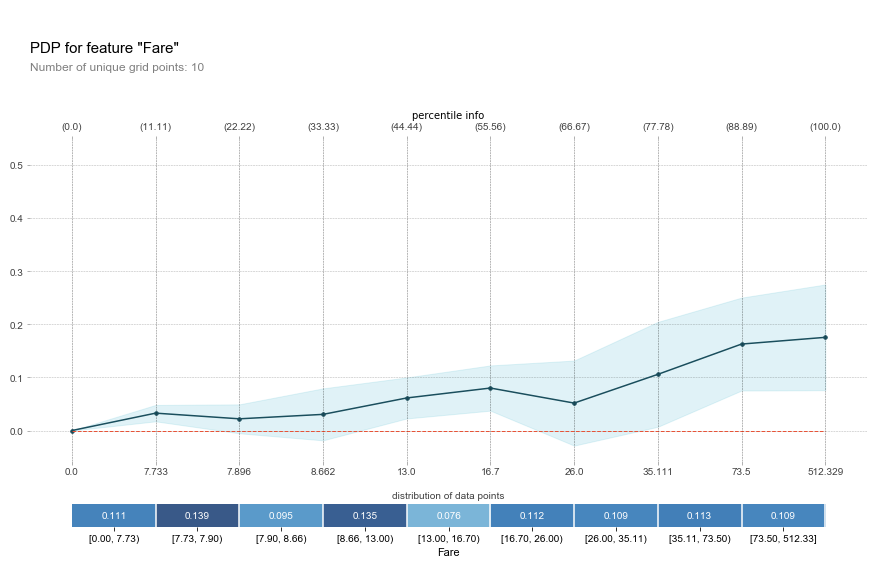

In [23]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True, show_percentile=True, plot_pts_dist=True)

In [24]:
# you can also add more number of grid points for the numeric feature
pdp_fare = pdp.pdp_isolate(model=titanic_model, 
                           dataset=titanic_data,
                           model_features=titanic_features,
                           feature='Fare', num_grid_points=20)

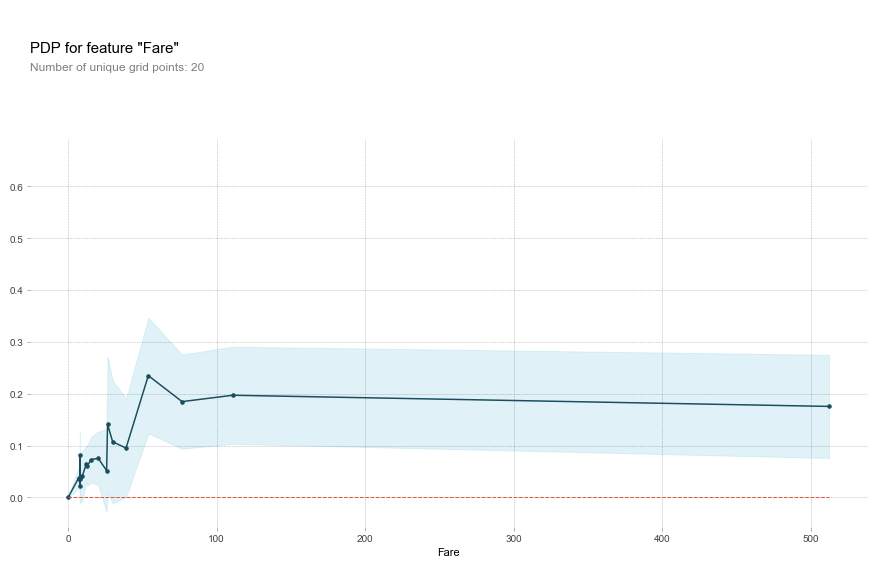

In [25]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=0.5)

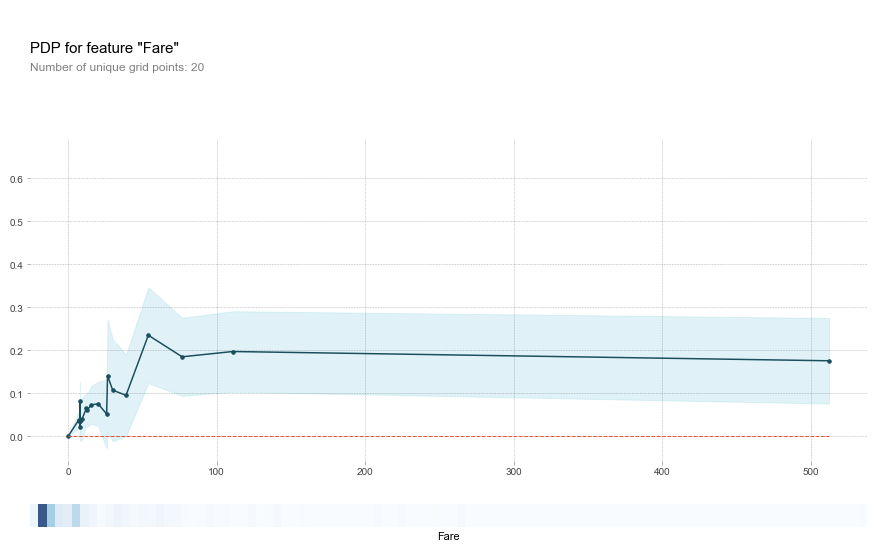

In [26]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=0.5, plot_pts_dist=True)

In [27]:
# try to choose a reasonable percentile range
pdp_fare = pdp.pdp_isolate(model=titanic_model, 
                           dataset=titanic_data,
                           model_features=titanic_features,
                           feature='Fare', 
                           num_grid_points=10, 
                           percentile_range=(5, 95))

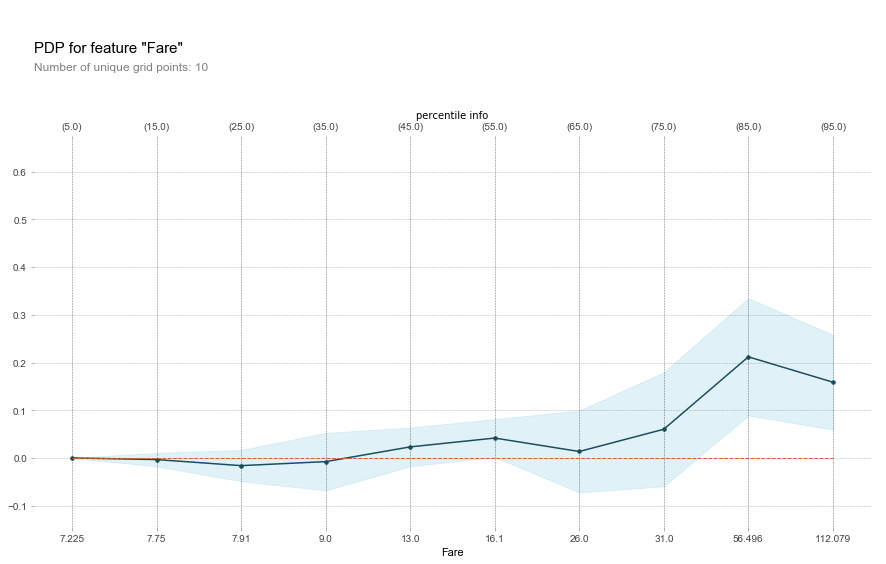

In [28]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=0.5, x_quantile=True, show_percentile=True)

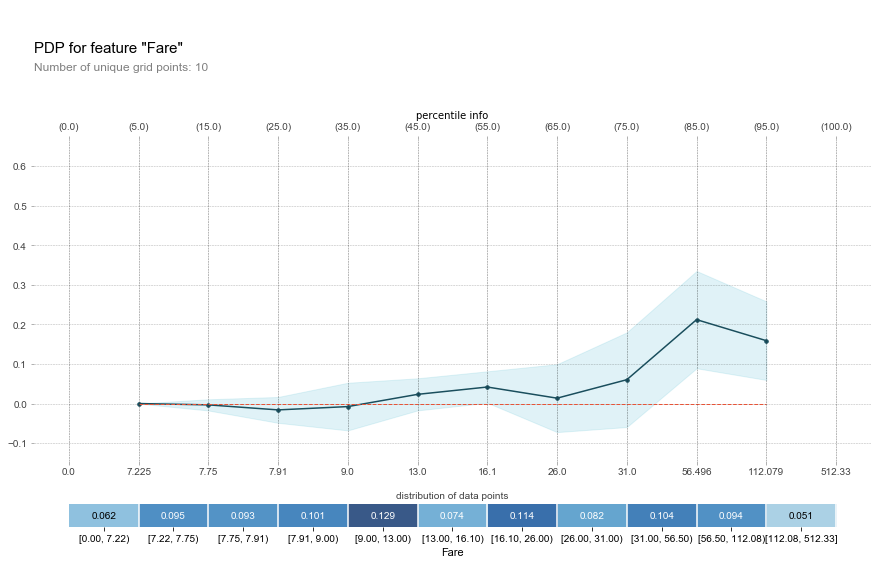

In [29]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=0.5, x_quantile=True, show_percentile=True, plot_pts_dist=True)

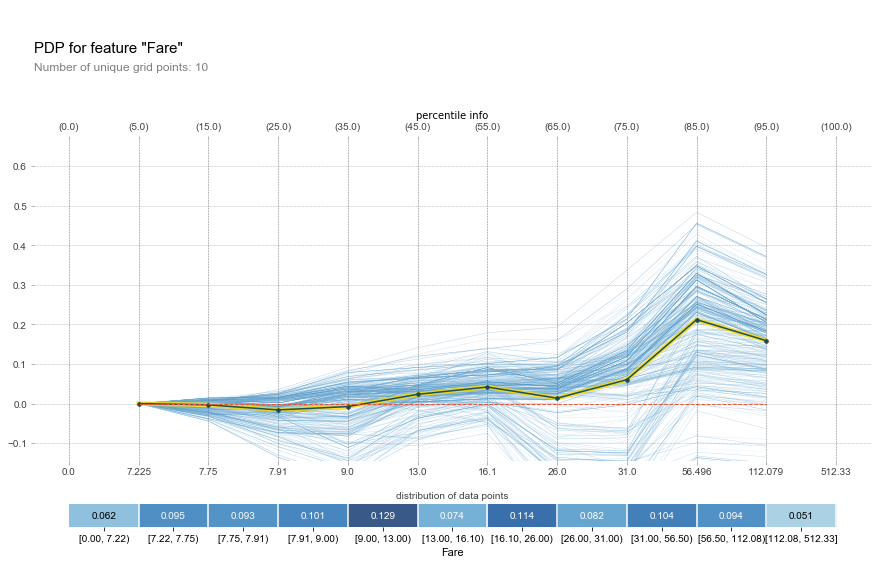

In [30]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=0.5, plot_lines=True,
                         x_quantile=True, show_percentile=True, plot_pts_dist=True)

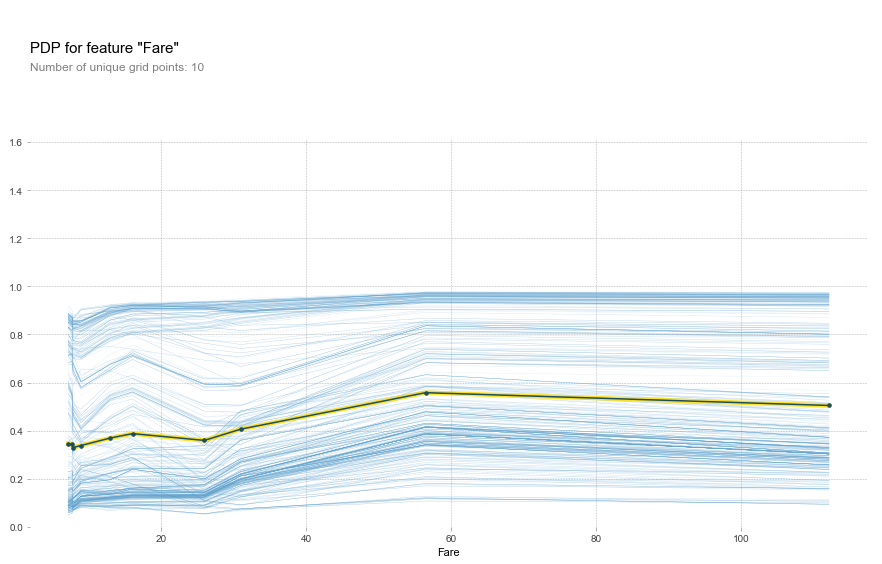

In [31]:
# try to set center=False
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5, center=False)

In [32]:
pdp_fare = pdp.pdp_isolate(model=titanic_model, 
                           dataset=titanic_data,
                           model_features=titanic_features,
                           feature='Fare', 
                           grid_type='equal', 
                           grid_range=(0, 50))

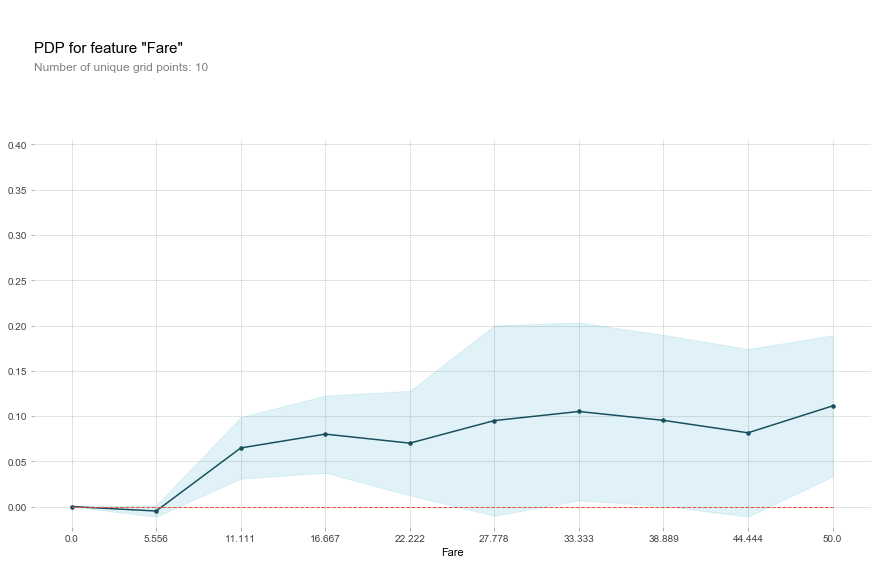

In [33]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=100, x_quantile=True)

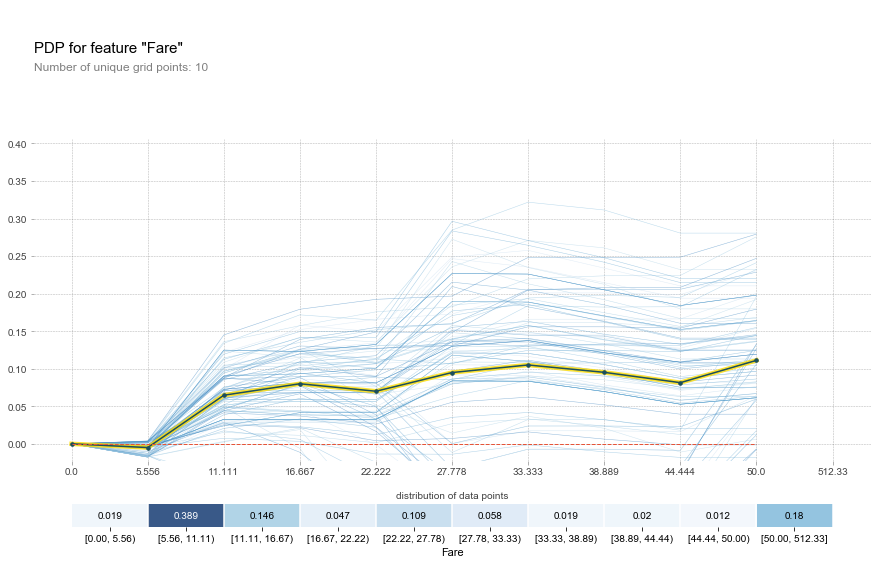

In [34]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=100, x_quantile=True, plot_pts_dist=True, plot_lines=True)

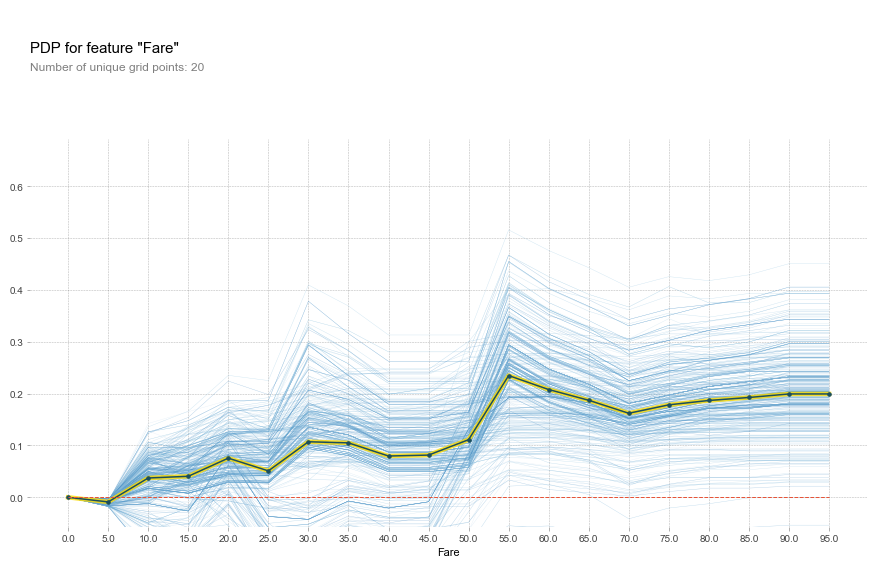

In [35]:
# try to customized the grid points
pdp_fare = pdp.pdp_isolate(model=titanic_model, 
                           dataset=titanic_data,
                           model_features=titanic_features,
                           feature='Fare', 
                           cust_grid_points=range(0, 100, 5))
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5, x_quantile=True)

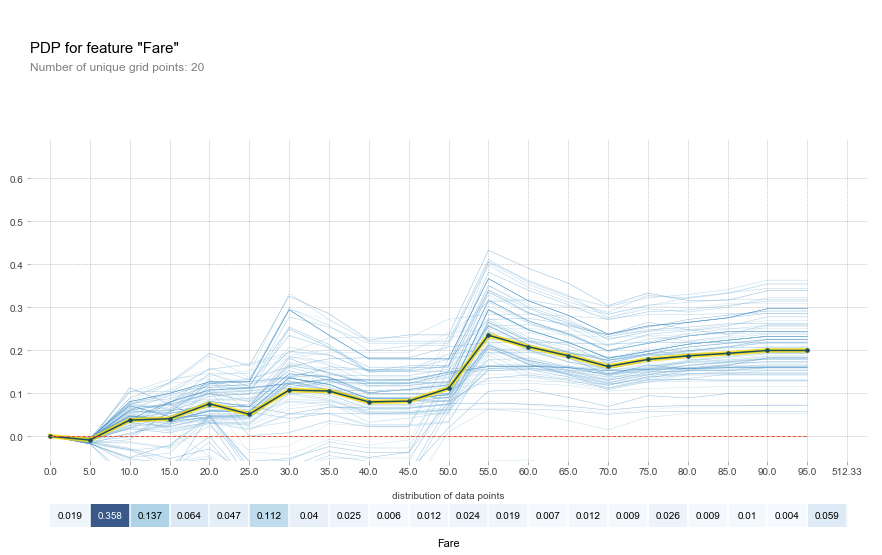

In [36]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=100, x_quantile=True, plot_pts_dist=True)
_ = axes['pdp_ax']['_count_ax'].set_xticklabels([])
_ = axes['pdp_ax']['_count_ax'].tick_params(which="major", bottom=False, left=False)

## Test interaction between two variables
### interaction between two numeric variables Age and Fare

In [6]:
%matplotlib inline

In [7]:
inter1 = pdp.pdp_interact(titanic_model, titanic_data[titanic_features], ['Age', 'Fare'], 
                          num_grid_points=[10, 10], percentile_ranges=[(5, 95), (5, 95)])

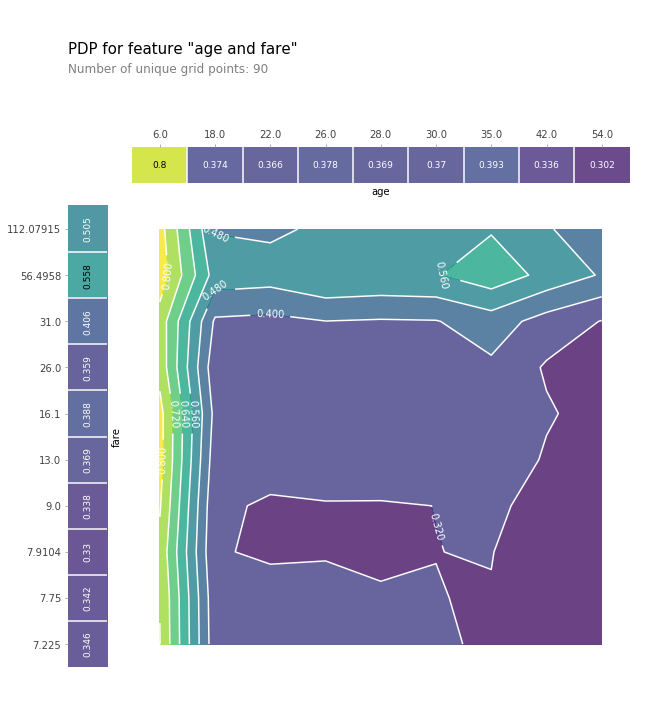

In [10]:
fig, axes = pdp.pdp_interact_plot(inter1, ['age', 'fare'], plot_type='contour', x_quantile=True, plot_pdp=True)

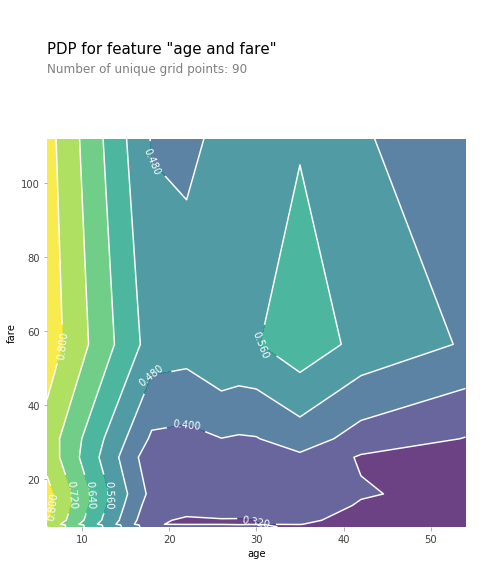

In [11]:
fig, axes = pdp.pdp_interact_plot(inter1, ['age', 'fare'], plot_type='contour', x_quantile=False, plot_pdp=False)

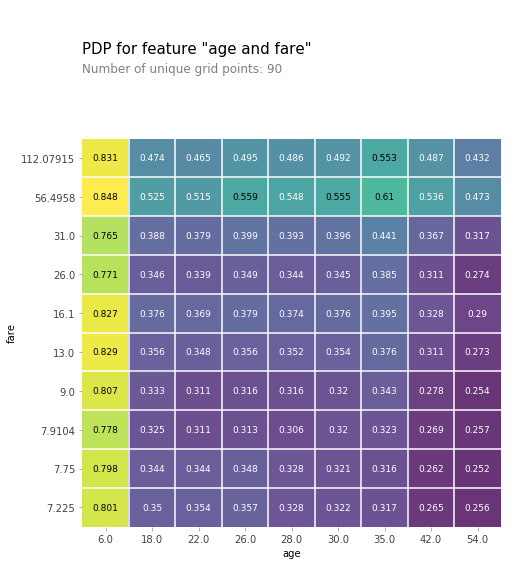

In [12]:
fig, axes = pdp.pdp_interact_plot(inter1, ['age', 'fare'], plot_type='grid', x_quantile=True, plot_pdp=False)

In [21]:
axes

{'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6197a68cd0>,
 'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6197a3fe50>}

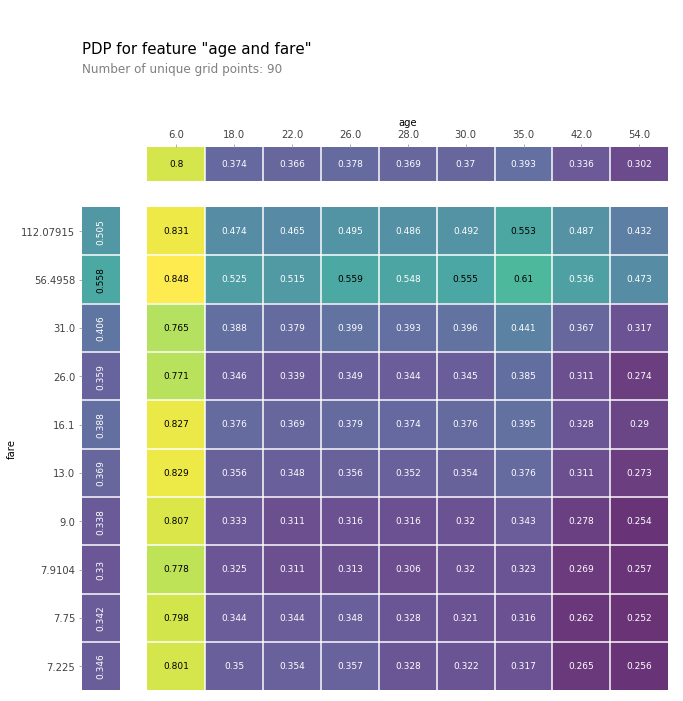

In [10]:
fig, axes = pdp.pdp_interact_plot(inter1, ['age', 'fare'], plot_type='grid', x_quantile=True, plot_pdp=True)

In [4]:
a = ['0', '1']

In [5]:
'%s and %s' % a

TypeError: not enough arguments for format string

In [38]:
np.meshgrid(range(3), range(5))

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]), array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]])]